In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve,mean_squared_error, mean_absolute_error, ConfusionMatrixDisplay, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
gender= pd.read_csv('gender_classification.csv')

In [3]:
gender

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [4]:
gender.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [5]:
gender.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [6]:
gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [7]:
gender['gender'].nunique()

2

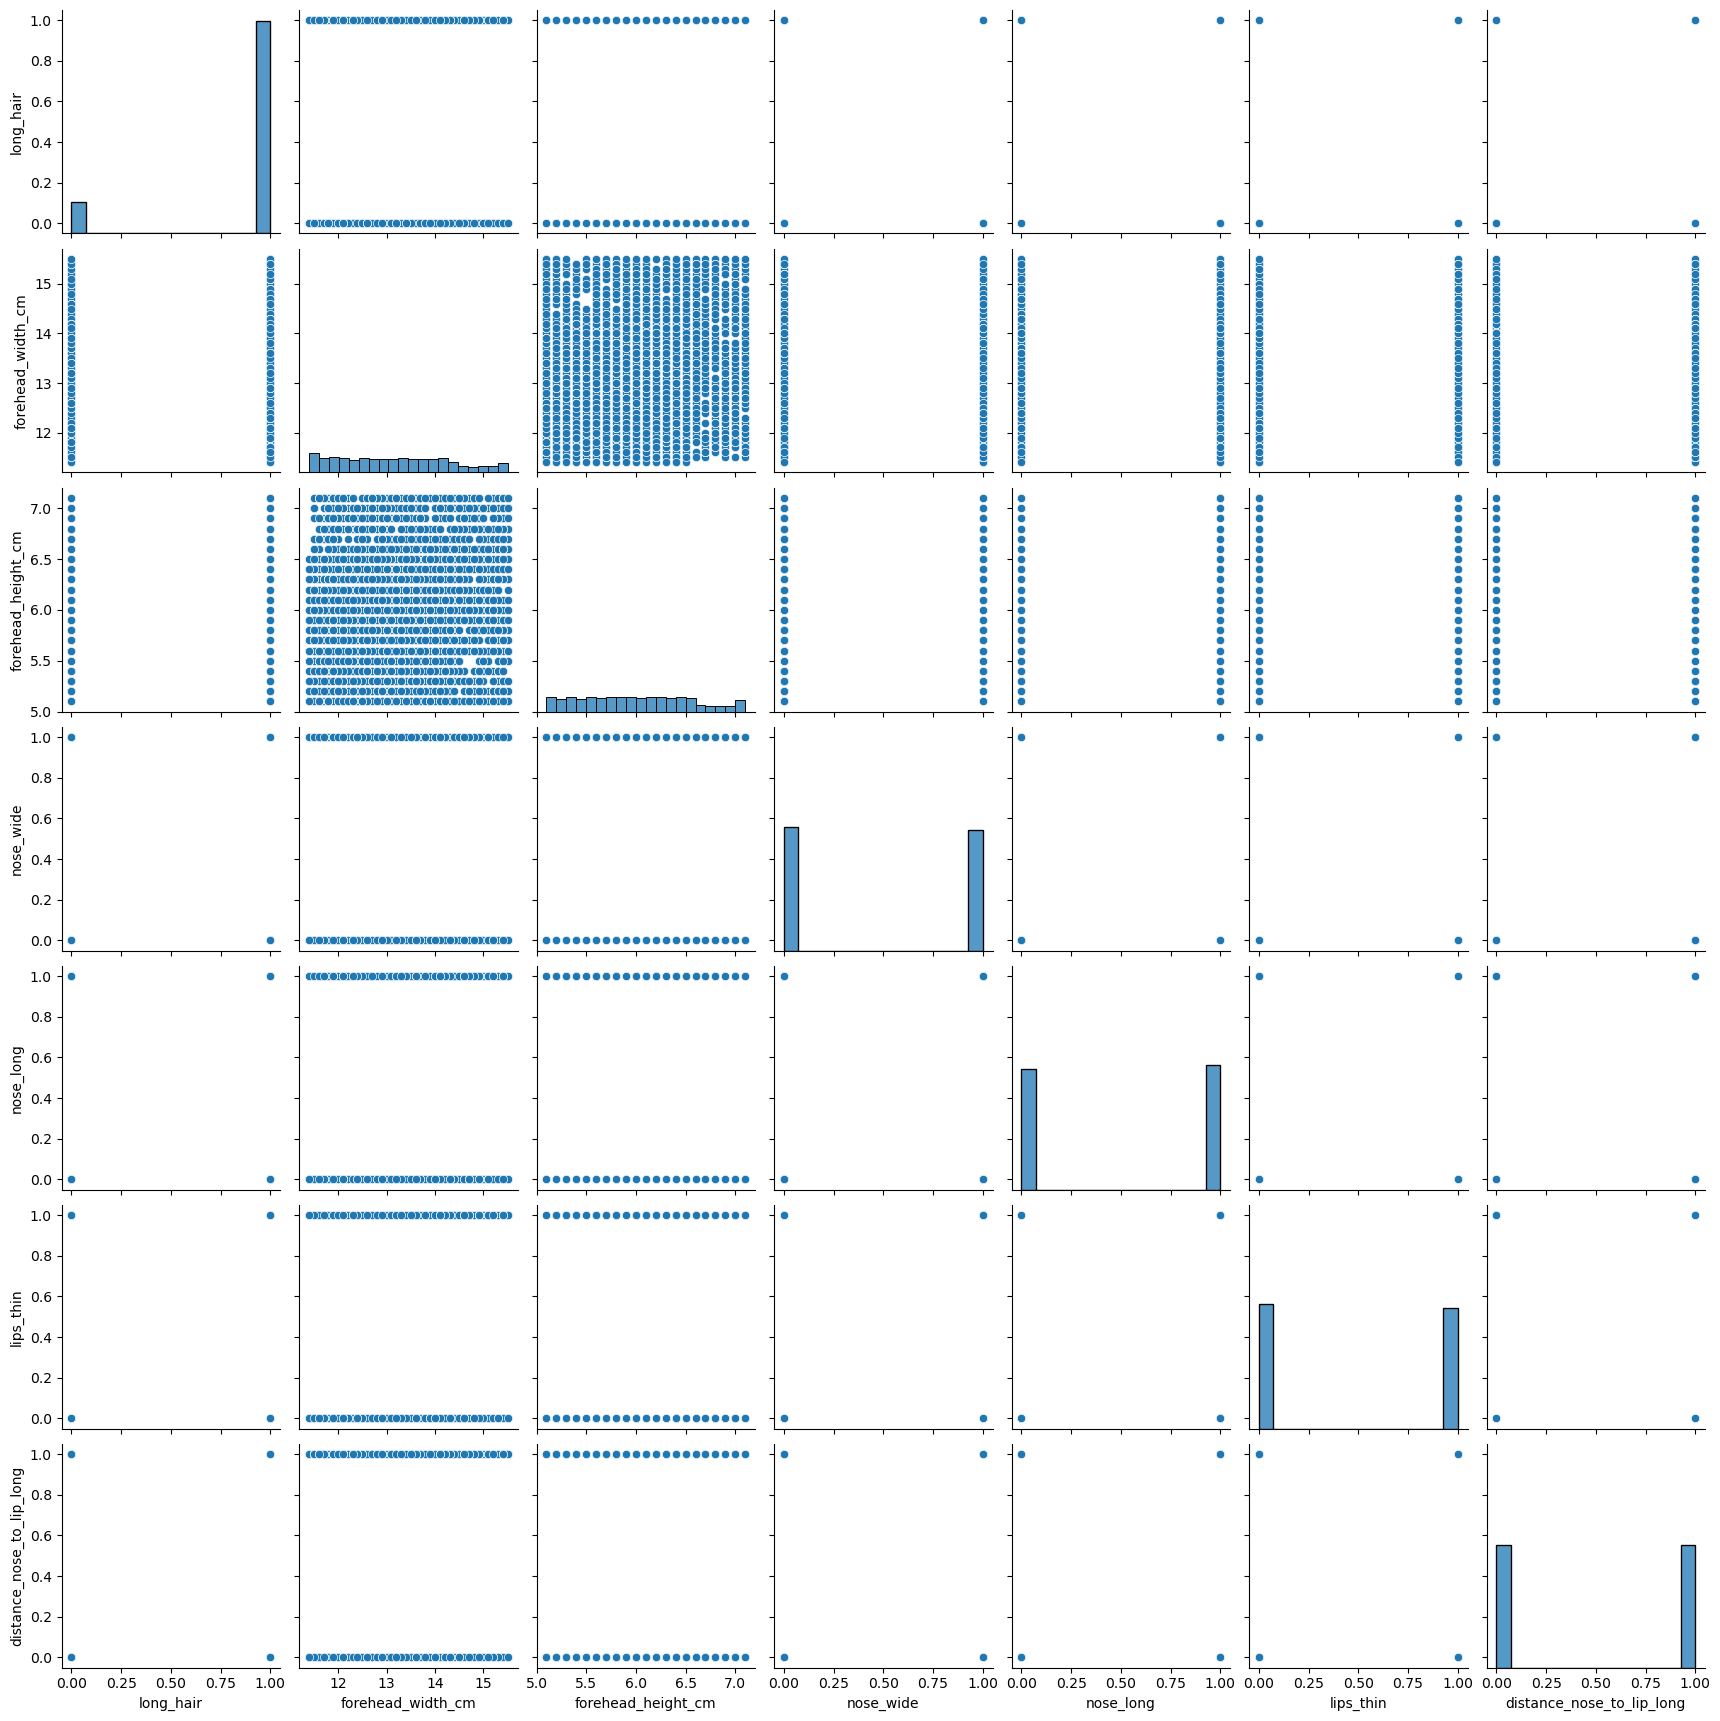

In [8]:
sns.pairplot(data= gender);

<Axes: xlabel='gender', ylabel='count'>

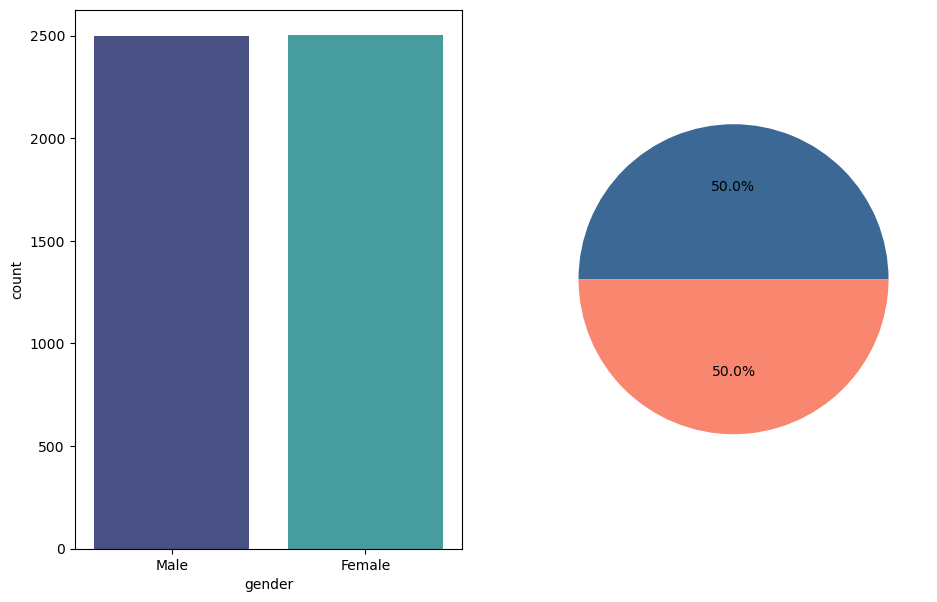

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(11, 7))

colors = ["#3B6895", "#F9866F"]
plt.pie(gender['gender'].value_counts(), colors = colors, autopct = '%1.1f%%')

sns.countplot(x='gender', data=gender, palette="mako", ax=axes[0])


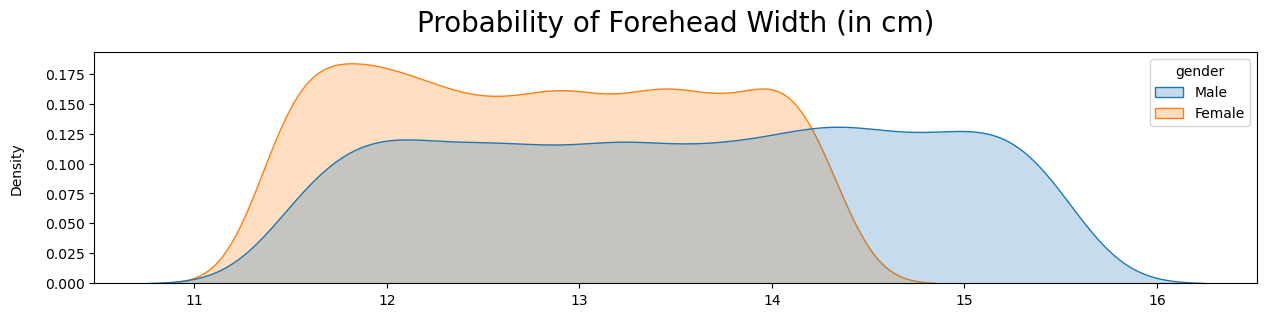

In [10]:
plt.figure(figsize=(15, 3))
plt.title('Probability of Forehead Width (in cm)', fontsize=20, pad=15)
sns.kdeplot(gender, x='forehead_width_cm', hue='gender', fill='fill')
plt.xlabel('')
plt.ylabel('Density', labelpad=15)
plt.show()

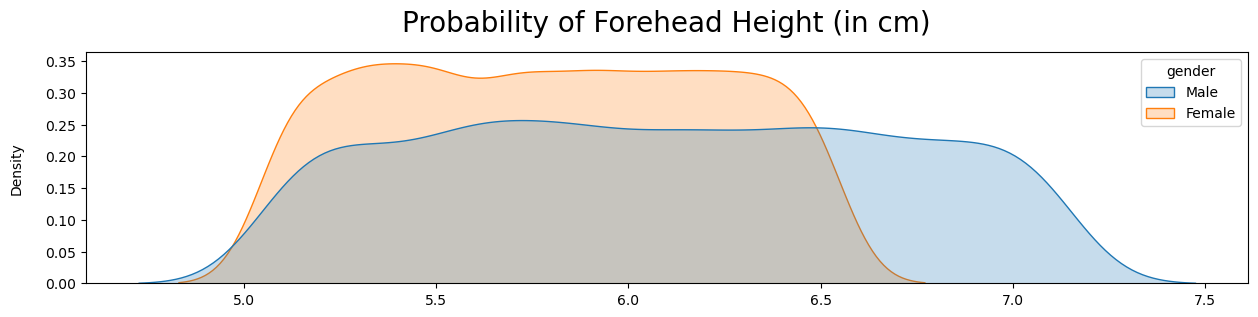

In [11]:
plt.figure(figsize=(15, 3))
plt.title('Probability of Forehead Height (in cm)', fontsize=20, pad=15)
sns.kdeplot(gender, x='forehead_height_cm', hue='gender', fill='fill')
plt.xlabel('')
plt.ylabel('Density', labelpad=15)
plt.show()

In [12]:
x = gender.drop('gender',axis=1)
y = gender['gender']

In [13]:
label = LabelEncoder()
y = label.fit_transform(y)

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x, y, train_size = 0.8, random_state=42)

# Decision Tree

In [15]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
y_pred = dt_model.predict(x_test)

In [17]:
acc1 = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'. format(acc1 * 100))

Accuracy: 95.30%


In [18]:
r2 = r2_score(y_test, y_pred)
print('Accuracy: {:.2f}%'. format(r2 * 100))

Accuracy: 81.22%


# Random Forest

In [19]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
y1_pred = rf_model.predict(x_test)

In [25]:
r2score = r2_score(y_test, y1_pred)
print('Accuracy: {:.2f}%'. format(r2score * 100))

Accuracy: 87.61%


In [28]:
y1_pred

array([1.  , 0.  , 0.  , ..., 0.  , 1.  , 0.81])

In [40]:
y1_pred = np.round(y1_pred).astype(int)

In [42]:
acc = metrics.accuracy_score(y_test, y1_pred)
print('Accuracy: {:.2f}%'. format(acc * 100))

Accuracy: 95.80%


In [43]:
pred = {'actual':y_test, 'prediction':y1_pred}
pd.DataFrame(data=pred)

,actual,prediction
0,1,1
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
996,0,0
997,1,1
998,0,0
999,1,1


# classification Report

In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       502
           1       0.96      0.95      0.95       499

    accuracy                           0.95      1001
   macro avg       0.95      0.95      0.95      1001
weighted avg       0.95      0.95      0.95      1001



In [46]:
print(metrics.classification_report(y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       502
           1       0.96      0.95      0.96       499

    accuracy                           0.96      1001
   macro avg       0.96      0.96      0.96      1001
weighted avg       0.96      0.96      0.96      1001



In [48]:
probab=rf_model.predict_proba(x_train)[:,1]

fpr,tpr,threshold=roc_curve(y_train,probab)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title(roc_auc_score(y_train,probab))
plt.show()

AttributeError: 'RandomForestRegressor' object has no attribute 'predict_proba'